In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv('/content/portfolio_data.csv')

In [7]:
df.head(2)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428


In [ ]:
df.index

RangeIndex(start=0, stop=1520, step=1)

In [ ]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [ ]:
df.size

7600

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [ ]:
np.unique(df['AMZN'])

array([ 248.229996,  252.550003,  255.720001, ..., 2012.709961,
       2012.97998 , 2039.51001 ])

In [ ]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


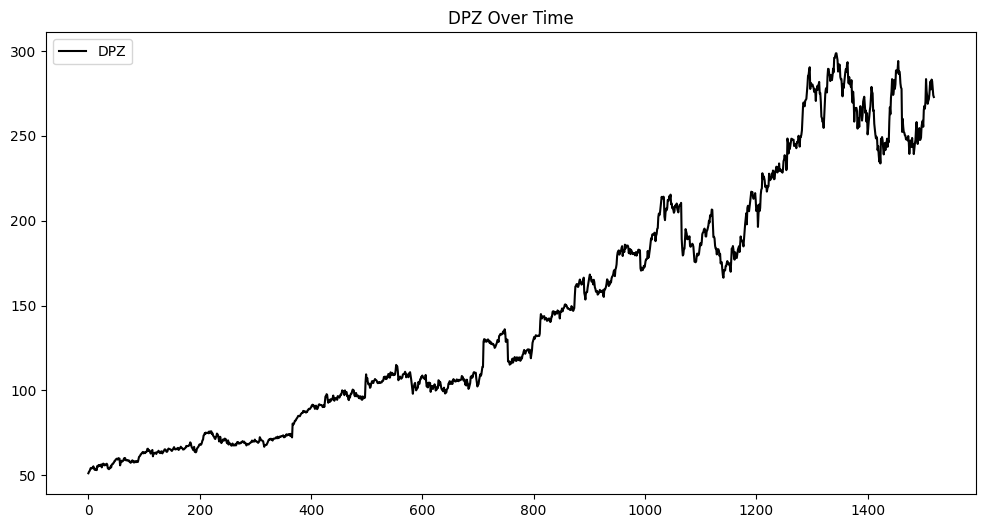

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DPZ'], label='DPZ', color='black')
plt.title('DPZ Over Time')
plt.legend()
plt.grid(False)
plt.show()

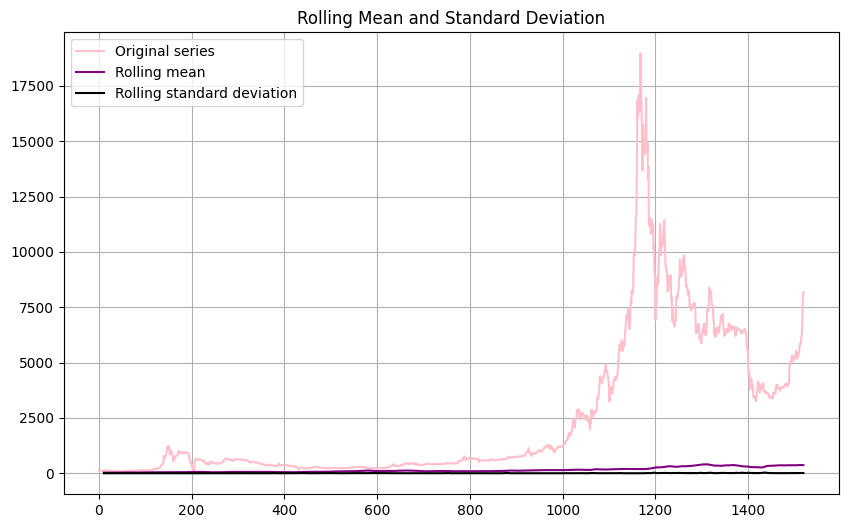

In [ ]:
rolling_mean = df['NFLX'].rolling(12).mean()
rolling_std = df['NFLX'].rolling(12).std()

plt.figure(figsize=(10, 6))
plt.plot(df['BTC'], color='pink', label='Original series')
plt.plot(rolling_mean, color='purple', label='Rolling mean')
plt.plot(rolling_std, color='black', label='Rolling standard deviation')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

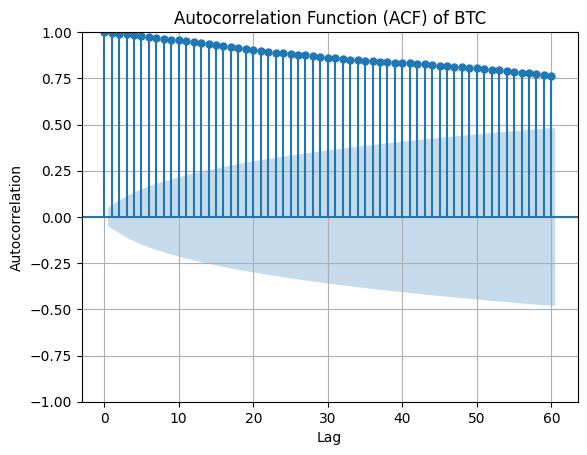

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(df['BTC'], lags=60, alpha=0.05,)
plt.title('Autocorrelation Function (ACF) of BTC')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

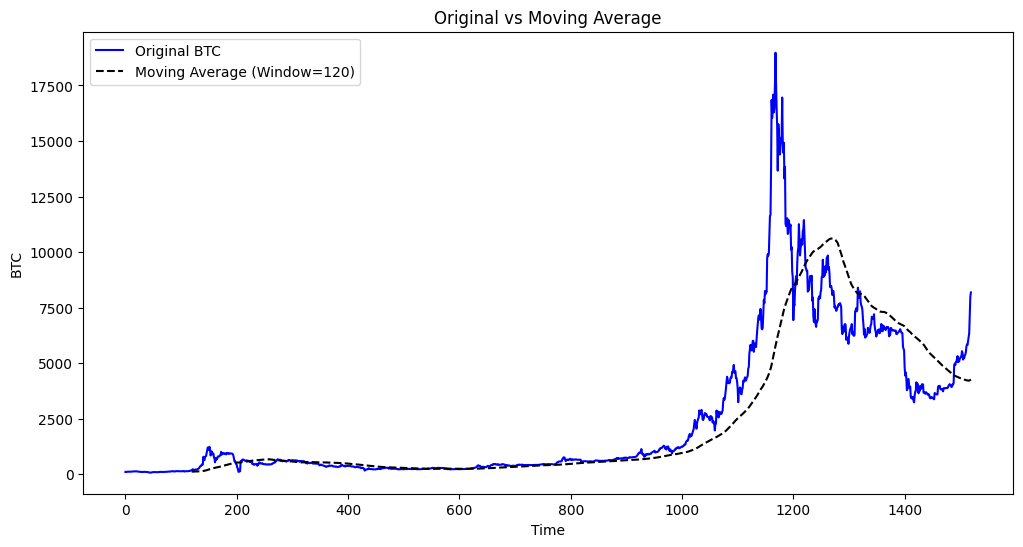

In [ ]:
window_size = 120
df['BTC_smoothed'] = df['BTC'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['BTC'], label='Original BTC', color='blue')
plt.plot(df['BTC_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

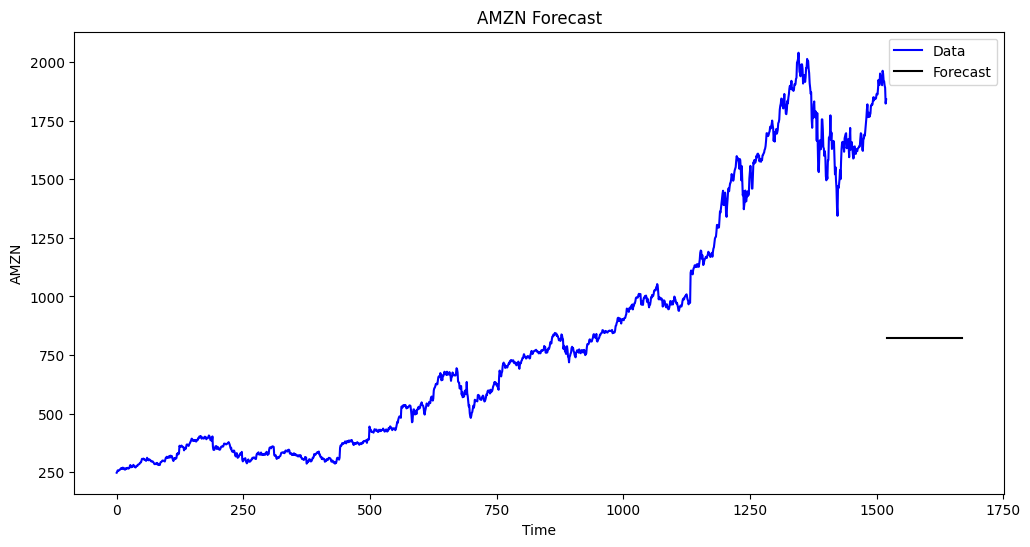

In [ ]:
model = ARIMA(df['AMZN'])
fit_model = model.fit()

forecast = fit_model.get_forecast(steps=150)

plt.figure(figsize=(12, 6))
plt.plot(df['AMZN'], label='Data', color='blue')
plt.plot(forecast.predicted_mean, label='Forecast', color='black')
plt.title('AMZN Forecast')
plt.xlabel('Time')
plt.ylabel('AMZN')
plt.legend()
plt.show()

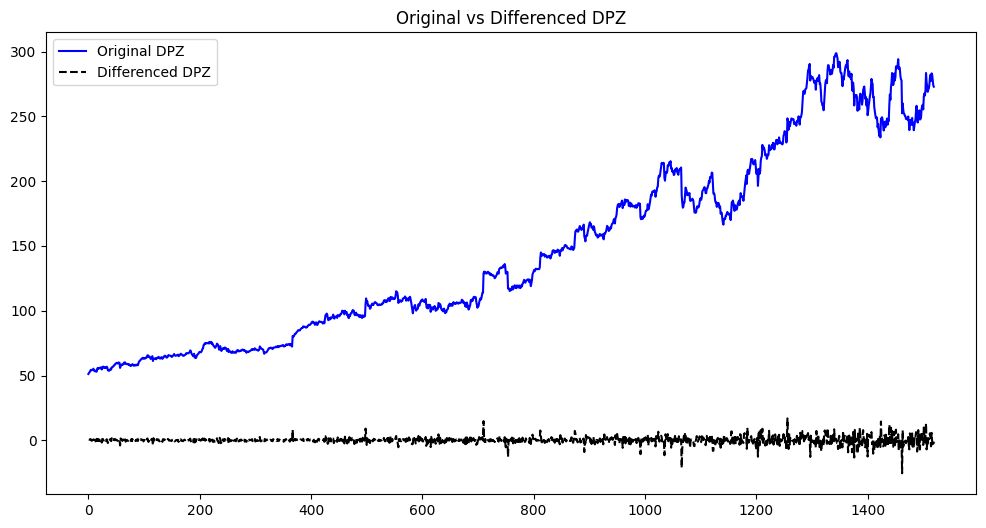

In [ ]:
df['DPZ_diff'] = df['DPZ'].diff()
plt.figure(figsize=(12, 6))
plt.plot(df['DPZ'], label='Original DPZ', color='blue')
plt.plot(df['DPZ_diff'], label='Differenced DPZ', linestyle='--', color='black')
plt.legend()
plt.title('Original vs Differenced DPZ')
plt.show()

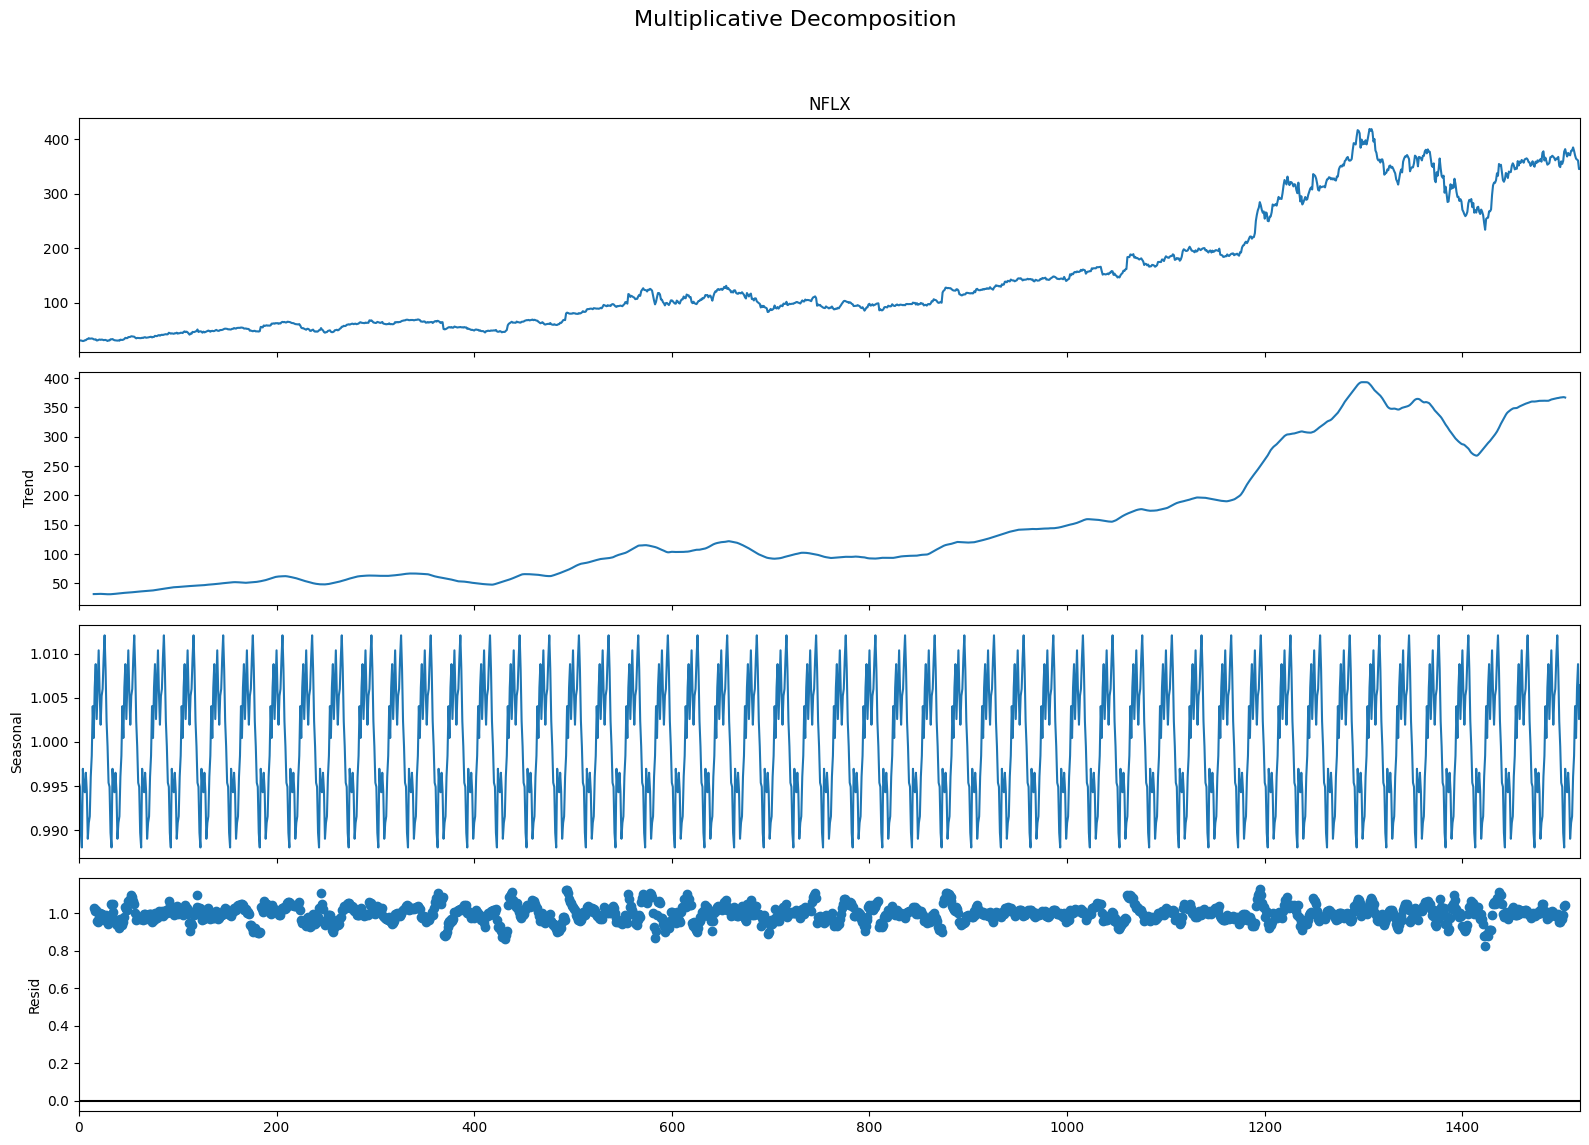

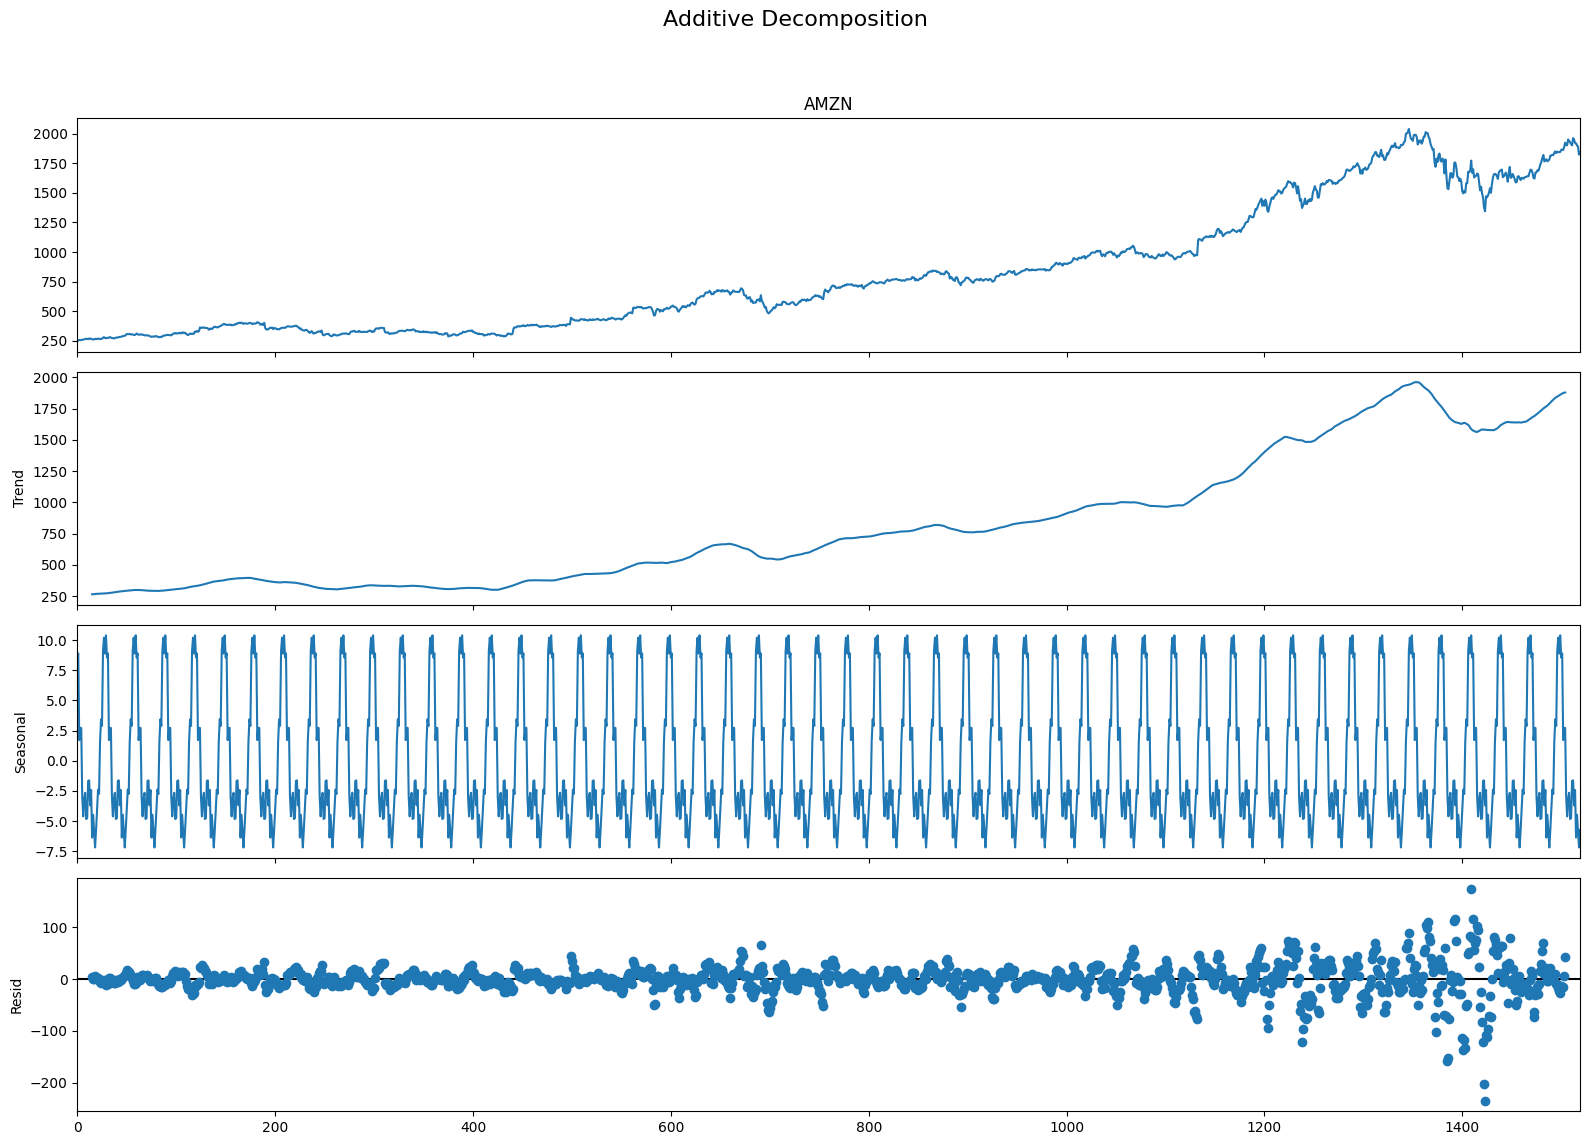

In [ ]:
multiplicative_decomposition = seasonal_decompose(df['NFLX'], model='multiplicative', period=30)
additive_decomposition = seasonal_decompose(df['AMZN'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()